<a href="https://colab.research.google.com/github/kalebddelk/keras/blob/master/deep_learning_with_python_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuring Deep Learning Workstation

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
!ls '/content/drive/My Drive'
!pip install -q keras

'10 pop-bys.gdoc'
'12 week plan 4 1 19-6 23 19.gsheet'
'12 week plan 7 8 19-9 29 19.gsheet'
'12 week plan: Week 10 - 6 3 19 to 6 9 19.gsheet'
'12 week plan: Week 11 - 6 10 19 to 6 16 19.gsheet'
'12 week plan: Week 12 - 6 24 19 to 6 30 19.gsheet'
'12 week plan: Week 1 - 4 1 19 to 4 7 19.gsheet'
'12 week plan: Week 2 - 4 8 19 to 4 14 19.gsheet'
'12 week plan: Week 3 - 4 15 19 to 4 21 19.gsheet'
'12 week plan: Week 4 - 4 22 19 to 4 28 19.gsheet'
'12 week plan: Week 5 - 4 29 19 to 5 5 19.gsheet'
'12 week plan: Week 6 - 5 6 19 to 5 12 19.gsheet'
'12 week plan: Week 7 - 5 13 19 to 5 19 19.gsheet'
'12 week plan: Week 8 - 5 20 19 to 5 26 19.gsheet'
'12 week plan: Week 9 - 5 27 19 to 6 2 19.gsheet'
'12 Week Year Chapter 17 Discussion.gdoc'
'2018 Banquet.gsheet'
 2019_05_09_08_30_06.pdf
'2428 Tillet comps.gdoc'
'2br Rentals available Bburg under $800.gdoc'
'325 Oak Tree.gsite'
'95 Crescent'
'Agent Information & Training Form-Southwest.gdoc'
'Agent website help.gdoc'
'Analysis of Ever Be.gdoc'
"A

In [3]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

Using TensorFlow backend.


In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='mse',
             metrics=['accuracy'])

# Classifying Movie Reviews:

In [0]:
# get database of reviews
from keras.datasets import imdb

In [6]:
import numpy as np
# save np.load
np_load_old = np.load

#modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

#call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17465344/17464789 [==============================] - 2s 0us/step


In [0]:
#restore np.load for future normal usage
np.load = np_load_old



---

*Encode the integer sequences into a binary matrix*




In [0]:
def vectorize_sequences(sequences, dimension=10000):
  # creates an all-zero matrix of shape (len(sequences), dimension)
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    # sets specific indices of results[i] to 1's
    results[i, sequence] = 1.
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
# what samples look like now
 x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

---
*vectorize labels, too*





In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

**Build the Network**



*   Two intermediate layers with 16 units each
*   A third layer that will output the scalar prediction regarding the sentiment of the current review



In [10]:
#reset the modules
from keras import models
from keras import layers

# relu is "rectified linear unit". It zero's out negative values
# sigmoid squashes arbitrary values into the [0, 1] interval
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0807 16:21:20.820437 140248176170880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0807 16:21:20.865542 140248176170880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0807 16:21:20.891584 140248176170880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



*Add loss function and optimizer*

In [0]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

*Create validation set by setting apart 10,000 samples from the original training data*

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Train the model**

In [0]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

W0717 15:08:04.109589 139677700343680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 354us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val_ac

In [17]:
# metrics stored in history object
 history_dict = history.history
 history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

*Plot the training and validation loss*

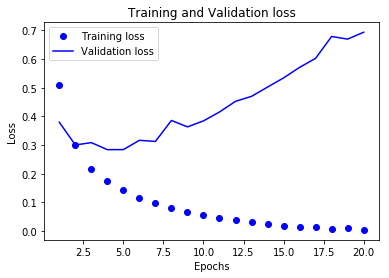

In [0]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

# 'bo' is for 'blue dot', 'b' is for 'solid blue line'
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


*Plot training and validation accuracy*

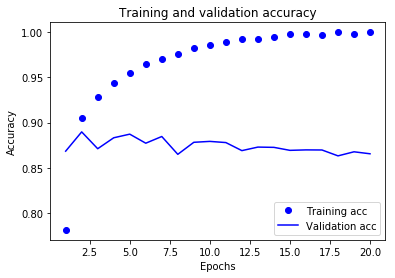

In [0]:
# clears figure
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()




> This model is *overfitted*, meaning that it is overoptimized on the training data and doesn't generalize well outside of the training set


---

**Retrain model from scratch**



In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 61us/step - loss: 0.2666 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 1s 57us/step - loss: 0.1987 - acc: 0.9292
Epoch 4/4
25000/25000 [==============================] - 2s 81us/step


performs at 87% on the test set

In [0]:
results

[0.3238562035751343, 0.87308]

**Use trained network to generate prediction on new data**

In [0]:
model.predict(x_test)

array([[0.13560072],
       [0.99971175],
       [0.27816382],
       ...,
       [0.07139969],
       [0.04283795],
       [0.4738391 ]], dtype=float32)



> Very confident on some samples (>.9 or <.1), but weaker on others



**Further experiments**


*One hidden layer*



In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.4477 - acc: 0.8325
Epoch 2/4
25000/25000 [==============================] - 2s 62us/step - loss: 0.2797 - acc: 0.9077
Epoch 3/4
25000/25000 [==============================] - 1s 58us/step - loss: 0.2214 - acc: 0.9244
Epoch 4/4
25000/25000 [==============================] - 2s 87us/step


In [0]:
print(results)

print(model.predict(x_test))

[0.27894223413467406, 0.8888]
[[0.26176482]
 [0.999821  ]
 [0.8291658 ]
 ...
 [0.13974896]
 [0.11718065]
 [0.48576462]]


*Three hidden layers*

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results= model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 84us/step - loss: 0.4602 - acc: 0.8176
Epoch 2/4
25000/25000 [==============================] - 2s 64us/step - loss: 0.2505 - acc: 0.9106
Epoch 3/4
25000/25000 [==============================] - 1s 60us/step - loss: 0.2010 - acc: 0.9260
Epoch 4/4
25000/25000 [==============================] - 2s 90us/step


In [0]:
print(results)

print(model.predict(x_test))

[0.3063553477191925, 0.88016]
[[0.16952187]
 [0.99978185]
 [0.73357415]
 ...
 [0.09773767]
 [0.04309389]
 [0.47675127]]


*Layers with 32 hidden units*

In [0]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results= model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 83us/step - loss: 0.4273 - acc: 0.8263
Epoch 2/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.2414 - acc: 0.9115
Epoch 3/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.1864 - acc: 0.9318
Epoch 4/4
25000/25000 [==============================] - 2s 89us/step


In [0]:
print(results)

print(model.predict(x_test))

[0.3311830430698395, 0.8732]
[[0.10435268]
 [0.99993813]
 [0.79237556]
 ...
 [0.10573304]
 [0.04404742]
 [0.57043177]]


*Layers with 64 hidden units*

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results= model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.4191 - acc: 0.8132
Epoch 2/4
25000/25000 [==============================] - 2s 62us/step - loss: 0.2404 - acc: 0.9076
Epoch 3/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.1832 - acc: 0.9311
Epoch 4/4
25000/25000 [==============================] - 2s 89us/step


In [0]:
print(results)

print(model.predict(x_test))

[0.33375497378349306, 0.8746]
[[0.14198777]
 [0.99975795]
 [0.991109  ]
 ...
 [0.18764108]
 [0.05120301]
 [0.9024277 ]]


*Layers with 8 hidden units*

In [0]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results= model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 84us/step - loss: 0.5327 - acc: 0.7933
Epoch 2/4
25000/25000 [==============================] - 2s 62us/step - loss: 0.3335 - acc: 0.8982
Epoch 3/4
25000/25000 [==============================] - 1s 58us/step - loss: 0.2461 - acc: 0.9188
Epoch 4/4
25000/25000 [==============================] - 2s 90us/step


In [0]:
print(results)

print(model.predict(x_test))

[0.2870816803359985, 0.8854]
[[0.24418506]
 [0.9996493 ]
 [0.73706865]
 ...
 [0.14260471]
 [0.08764443]
 [0.4586814 ]]


*Different loss function (mse)*

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results= model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.1442 - acc: 0.8188
Epoch 2/4
25000/25000 [==============================] - 2s 60us/step - loss: 0.0774 - acc: 0.9108
Epoch 3/4
25000/25000 [==============================] - 1s 57us/step - loss: 0.0581 - acc: 0.9324
Epoch 4/4
25000/25000 [==============================] - 2s 86us/step


In [0]:
print(results)

print(model.predict(x_test))

[0.09137652460813522, 0.87544]
[[0.21344733]
 [0.9998583 ]
 [0.96910673]
 ...
 [0.24443063]
 [0.14749804]
 [0.72448874]]


*Different activation (tanh*)

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results= model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 84us/step - loss: 0.4143 - acc: 0.8289
Epoch 2/4
25000/25000 [==============================] - 2s 61us/step - loss: 0.2308 - acc: 0.9133
Epoch 3/4
25000/25000 [==============================] - 1s 58us/step - loss: 0.1761 - acc: 0.9341
Epoch 4/4
25000/25000 [==============================] - 2s 93us/step


In [0]:
print(results)

print(model.predict(x_test))

[0.33124879012584685, 0.87564]
[[0.11206976]
 [0.99881685]
 [0.8501334 ]
 ...
 [0.15507013]
 [0.0729228 ]
 [0.84427315]]


# Classifying Newswires:
*Multiclassification*

This is a classification of the *Reuters dataset*, a set of short newswires and their topics, published by Reuters in 1986. There are 46 different topics...each topic has at least 10 examples in the training set.

In [0]:
from keras.datasets import reuters

import numpy as np

#unpickle data
np_load_old = np.load
#modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

#call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = reuters.load_data (
    num_words=1000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [0]:
# 8,982 training examples
 len(train_data)

8982

In [0]:
#2,246 test examples
 len(test_data)

2246

Each example is a list of integers (word indices). We have restricted the data to the 10,000 most frequently occuring words from the data

In [0]:
import numpy as np

#vectorize the data
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)



> Use One-hot encoding to vectorize the labels



In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

Or use the built-in *to_categorical* function from Keras

```
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
```

In the Movie review classification example, 16-Dimensional Dense layers worked well to classify two classes (good or bad), but that may be too limited to learn to separate 46 different classes. The last layer means that for each input sample, the network will output a 46-D vector. *softmax* activation means the network will output a probability distribution over the 46 different output classes



In [0]:
from keras import models
from keras import layers

model = models.Sequential()
# start with two 64-dimensional hidden layers
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

The best loss function to use is categorical_crossentropy because it measures the distance between two probability distributions: here, between the probability distribution output by the network and the true distribution of the labels. By minimizing the distance between these two distributions, you train the network to output something as close as possible to the true labels.

In [0]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
# setting apart 1,000 samples in the training data to use as validation
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

**Training the Model**
for 20 epochs

In [0]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

W0723 20:31:20.885215 139780585990016 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0723 20:31:20.975728 139780585990016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 571us/step - loss: 2.6078 - acc: 0.4870 - val_loss: 1.8245 - val_acc: 0.5780
Epoch 2/20
7982/7982 [==============================] - 1s 71us/step - loss: 1.6343 - acc: 0.6333 - val_loss: 1.4848 - val_acc: 0.6600
Epoch 3/20
7982/7982 [==============================] - 1s 73us/step - loss: 1.3625 - acc: 0.7007 - val_loss: 1.3200 - val_acc: 0.7100
Epoch 4/20
7982/7982 [==============================] - 1s 73us/step - loss: 1.1973 - acc: 0.7385 - val_loss: 1.2014 - val_acc: 0.7320
Epoch 5/20
7982/7982 [==============================] - 1s 71us/step - loss: 1.0701 - acc: 0.7684 - val_loss: 1.1228 - val_acc: 0.7530
Epoch 6/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.9719 - acc: 0.7838 - val_loss: 1.0753 - val_acc: 0.7620
Epoch 7/20
7982/7982 [==============================] - 1s 73us/step - loss: 0.8946 - acc: 0.7990 - val_loss: 1.0344 - val_acc: 0.7610
Epoch 

**Display Loss and Accuracy curves**

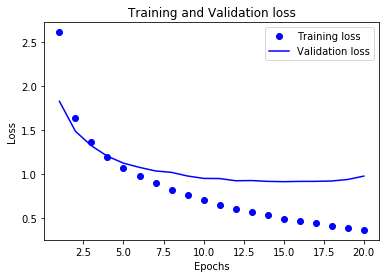

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

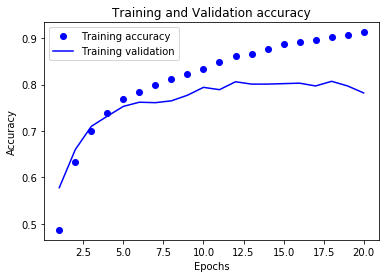

In [0]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Training validation')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



> We can see that the network begins to overfit after nine epochs, so let's traina new network from scratch for nine epochs and then evaluate it on the test set.



**Retraining the model**

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 97us/step - loss: 2.6550 - acc: 0.4966 - val_loss: 1.8184 - val_acc: 0.6120
Epoch 2/9
7982/7982 [==============================] - 1s 72us/step - loss: 1.5919 - acc: 0.6626 - val_loss: 1.4304 - val_acc: 0.6740
Epoch 3/9
7982/7982 [==============================] - 1s 73us/step - loss: 1.3025 - acc: 0.7125 - val_loss: 1.2648 - val_acc: 0.7170
Epoch 4/9
7982/7982 [==============================] - 1s 71us/step - loss: 1.1484 - acc: 0.7449 - val_loss: 1.1820 - val_acc: 0.7250
Epoch 5/9
7982/7982 [==============================] - 1s 72us/step - loss: 1.0341 - acc: 0.7714 - val_loss: 1.1039 - val_acc: 0.7510
Epoch 6/9
7982/7982 [==============================] - 1s 70us/step - loss: 0.9456 - acc: 0.7903 - val_loss: 1.0370 - val_acc: 0.7740
Epoch 7/9
7982/7982 [==============================] - 1s 71us/step - loss: 0.8619 - acc: 0.8053 - val_loss: 1.0157 - val_acc: 0.7850
Epoch 8/9
7982

**Final results**

In [0]:
results

[1.0210256621122147, 0.7600178094390027]

This approach reaches an accuracy of 76%, which isn't bad considering that a purely random classifier would get around 19%.

**Generating predictions for new data**

In [0]:
predictions = model.predict(x_test)

In [0]:
# each entry in 'predictions' is a vector of length 46
 predictions[0].shape

(46,)

In [0]:
# the coefficients in this vector sum to 1
 np.sum(predictions[0])

0.9999998

In [0]:
# the largest entry is the predicted class - the class with the highest probability
 np.argmax(predictions[0])

3

**Further Experiments**

* *Larger or Smaller Layers*
* *More or Fewers Hidden Layers*



In [0]:
model = models.Sequential()
# 128-D layers
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 110us/step - loss: 2.2218 - acc: 0.5372 - val_loss: 1.5151 - val_acc: 0.6510
Epoch 2/9
7982/7982 [==============================] - 1s 76us/step - loss: 1.3344 - acc: 0.7066 - val_loss: 1.2479 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 75us/step - loss: 1.1150 - acc: 0.7547 - val_loss: 1.1165 - val_acc: 0.7510
Epoch 4/9
7982/7982 [==============================] - 1s 74us/step - loss: 0.9651 - acc: 0.7850 - val_loss: 1.0310 - val_acc: 0.7780
Epoch 5/9
7982/7982 [==============================] - 1s 75us/step - loss: 0.8478 - acc: 0.8056 - val_loss: 0.9592 - val_acc: 0.7890
Epoch 6/9
7982/7982 [==============================] - 1s 75us/step - loss: 0.7504 - acc: 0.8282 - val_loss: 0.9309 - val_acc: 0.7900
Epoch 7/9
7982/7982 [==============================] - 1s 76us/step - loss: 0.6586 - acc: 0.8500 - val_loss: 0.9116 - val_acc: 0.7930
Epoch 8/9
798

[0.9368817472924957, 0.7845057880676759]

In [0]:
model = models.Sequential()
# 32-D layers
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 108us/step - loss: 3.2054 - acc: 0.3400 - val_loss: 2.5475 - val_acc: 0.5430
Epoch 2/9
7982/7982 [==============================] - 1s 74us/step - loss: 2.1357 - acc: 0.5983 - val_loss: 1.8155 - val_acc: 0.6140
Epoch 3/9
7982/7982 [==============================] - 1s 71us/step - loss: 1.6478 - acc: 0.6576 - val_loss: 1.5246 - val_acc: 0.6530
Epoch 4/9
7982/7982 [==============================] - 1s 72us/step - loss: 1.4230 - acc: 0.6857 - val_loss: 1.3686 - val_acc: 0.6880
Epoch 5/9
7982/7982 [==============================] - 1s 73us/step - loss: 1.2871 - acc: 0.7162 - val_loss: 1.2992 - val_acc: 0.7150
Epoch 6/9
7982/7982 [==============================] - 1s 73us/step - loss: 1.1912 - acc: 0.7350 - val_loss: 1.2187 - val_acc: 0.7350
Epoch 7/9
7982/7982 [==============================] - 1s 72us/step - loss: 1.1125 - acc: 0.7562 - val_loss: 1.1803 - val_acc: 0.7450
Epoch 8/9
798

[1.1652353429836773, 0.7364203027870012]

In [0]:
model = models.Sequential()
# 3 hidden layers
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 122us/step - loss: 2.6731 - acc: 0.4427 - val_loss: 1.8242 - val_acc: 0.5970
Epoch 2/9
7982/7982 [==============================] - 1s 73us/step - loss: 1.6237 - acc: 0.6452 - val_loss: 1.4408 - val_acc: 0.6720
Epoch 3/9
7982/7982 [==============================] - 1s 75us/step - loss: 1.3527 - acc: 0.7013 - val_loss: 1.2962 - val_acc: 0.7040
Epoch 4/9
7982/7982 [==============================] - 1s 75us/step - loss: 1.1904 - acc: 0.7330 - val_loss: 1.1958 - val_acc: 0.7290
Epoch 5/9
7982/7982 [==============================] - 1s 76us/step - loss: 1.0742 - acc: 0.7586 - val_loss: 1.1505 - val_acc: 0.7300
Epoch 6/9
7982/7982 [==============================] - 1s 74us/step - loss: 0.9834 - acc: 0.7783 - val_loss: 1.0771 - val_acc: 0.7530
Epoch 7/9
7982/7982 [==============================] - 1s 75us/step - loss: 0.8945 - acc: 0.7965 - val_loss: 1.0263 - val_acc: 0.7630
Epoch 8/9
798

[1.0557592944810141, 0.7604630454140695]

In [0]:
model = models.Sequential()
# 1 hidden layer
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 117us/step - loss: 2.7171 - acc: 0.5417 - val_loss: 1.9915 - val_acc: 0.6340
Epoch 2/9
7982/7982 [==============================] - 1s 75us/step - loss: 1.7112 - acc: 0.6787 - val_loss: 1.5083 - val_acc: 0.6900
Epoch 3/9
7982/7982 [==============================] - 1s 72us/step - loss: 1.3635 - acc: 0.7236 - val_loss: 1.2840 - val_acc: 0.7250
Epoch 4/9
7982/7982 [==============================] - 1s 73us/step - loss: 1.1734 - acc: 0.7547 - val_loss: 1.1634 - val_acc: 0.7530
Epoch 5/9
7982/7982 [==============================] - 1s 73us/step - loss: 1.0475 - acc: 0.7769 - val_loss: 1.0923 - val_acc: 0.7570
Epoch 6/9
7982/7982 [==============================] - 1s 72us/step - loss: 0.9540 - acc: 0.7900 - val_loss: 1.0302 - val_acc: 0.7760
Epoch 7/9
7982/7982 [==============================] - 1s 72us/step - loss: 0.8750 - acc: 0.8063 - val_loss: 0.9918 - val_acc: 0.7820
Epoch 8/9
798

[1.0072901440006437, 0.7609082814156743]

# Predicting House Prices:
*Regression*

Regression problems consist of predicting a continuous value instead of a discrete label: for instance, predicting the temparature tomorrow, given meteorological; or predicting the time that a software project will take to complete, given its specifications

**The Boston Housing Price dataset**

In [0]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 8us/step


In [0]:
# 404 training samples with 13 numerical features
train_data.shape

(404, 13)

In [0]:
# 102 test samples with 13 numerical features
test_data.shape

(102, 13)

In [0]:
# the targets are the median values of owner-occupied homes, in thousands of dollars
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

**Preparing the data**

When dealing with heterogenous data, a widespread best practice is to do feature-wise normalization: for each feature in the input data(a column in the input data matrix), you subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation.

In [0]:
# normalize the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

**Building the Network**

The network ends with a single unit and no activation (a linear layer). This is a typical setup for scalar regression. Applying an activation function would constrain the range the output can take. Here, because the layer is purely linear, the network is free to learn to predict values in any range unlike forcing it to predict a value between 0 and 1 as would be the case with the *sigmoid* activation function.

The model is compiled with the *mse (mean squared error)* loss function, and the *mae (mean absolute error)* is the new metric that measures the absolute value of the difference between the predictions and the targets. For instance, an MAE of 0.5 on this problem would mean the predictions are off by $500 on average.

In [0]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

With this model, if the data is split into training and validation sets, as with the previous examples, the validation set would end up too small, resulting in the validation scores having a high *variance*, making it hard to evaluate.

**K-fold validation**

Instead, best practice is to use *K-fold* cross-validation, which splits the available data into *K* partitions (typically, *K*=4 or 5), instantiating *K* identical models, and training eachy one on *K* - 1 partitions while evaluating on the remaining partition. The validation score for the model used is then the average of the *K* validation scores obtained.

In [0]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print('processing fold #', i)
  # prepares the validation data: data from partition #k
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  
  # prepares the training data: data from all other partitions
  partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i + 1) * num_val_samples:]],
    axis=0)
  partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i + 1) * num_val_samples:]],
    axis=0)
  
  # builds the Keras model (already compiled)
  model = build_model()
  # trains the model (in silent mode, verbose=0)
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=1, verbose=0)
  # evaluates the model on the validation data
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
all_scores

[2.257923147465923, 2.2001309324019025, 2.8750618802438868, 2.410775157484678]

In [0]:
np.mean(all_scores)

2.4359727793990977

**Training the model longer**

Try 500 epochs and keep a record of how well the model does at each epoch

In [0]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
all_scores = []

num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  # prepare validation data: data from partition #k
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  
  # prepare training data: data from all other partitions
  partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i + 1) * num_val_samples:]],
    axis=0)
  partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i + 1) * num_val_samples:]],
    axis=0)
  
  # build the Keras model (already compiled)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data=(val_data, val_targets),
                      epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

W0724 14:09:30.265810 140668296681344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 14:09:30.314257 140668296681344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 14:09:30.323283 140668296681344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 14:09:30.359928 140668296681344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



processing fold # 0


W0724 14:09:30.518008 140668296681344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0724 14:09:30.524621 140668296681344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
# compute the average of the per-epoch MAE scores for all folds
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

*Plotting the validation scores*

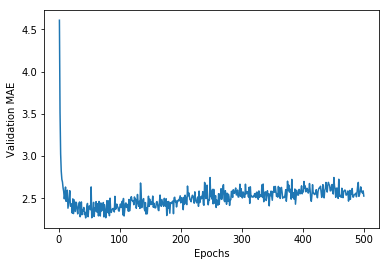

In [0]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()



> This is difficult to read due to scaling issues and relatively high variance. To make it easier to see, let's do the following:


1.   Omit the first 10 data points, which are on a different scale than the rest of the curve
2.   Replace each point with an exponential moving average of the previous points to obtain a smooth curve







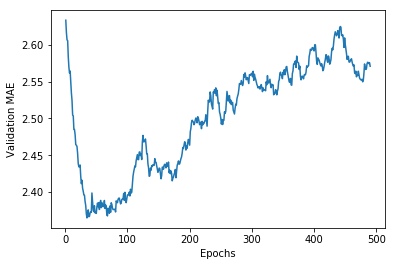

In [0]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

**Training the Final Model**

In [0]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 749us/step


Final result: still off by almost $3,000

In [0]:
test_mae_score

2.9620735598545447

# Validation


---

**Simple Hold-out Validation**

In [0]:
import numpy as np

num_validation_samples = 1000

# usually shuffle the data
np.random.shuffle(data)

# defines validation set
validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]

# defines training set
training_data = data[:]

# trains the model on the training data, and evaluates it on the validation data
model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)

# retrain, evaluate, tune...
model = get_model()
model.train(np.concatenate([training_data,
                            validation_data]))
test_score = model.evaluate(test_data)

# once hyperparameters are tuned, train final model from scratch on all non-test data available

**K-fold Validation**

In [0]:
k = 4
num_validation_samples = len(data) // k

np.random.shuffle(data)

validation_scores = []
for fold in range(k):
  # select the validation-data partition
  validation_data = data[num_validation_samples * fold:
                        num_validation_samples * (fold + 1)]
  # use remainder of the data as training data
  # the + operator is list concatenation, not summation
  training_data = data[:num_validation_samples * fold] +
                        data[num_validation_samples * (fold + 1):]
  # create a brand new instance of the model
  model = get_model()
  model.train(training_data)
  validation_score = model.evaluate(validation_data)
  validation_scores.append(validation_score)

# average validation scores of the k folds  
validation_score = np.average(validation_scores)

# train final model on all non-test data available
model = get_model()
model.train(data)
test_score = model.evaluate(test_data)
    

# Overfitting and Underfitting


---

The original movie-review classification network

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Version of the model with lower capacity

In [0]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

W0807 16:23:20.147824 140248176170880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 359us/step - loss: 0.6273 - acc: 0.6225 - val_loss: 0.5734 - val_acc: 0.6662
Epoch 2/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.5259 - acc: 0.7823 - val_loss: 0.5206 - val_acc: 0.8229
Epoch 3/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.4756 - acc: 0.8533 - val_loss: 0.4973 - val_acc: 0.8062
Epoch 4/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.4418 - acc: 0.8878 - val_loss: 0.4785 - val_acc: 0.8397
Epoch 5/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.4160 - acc: 0.9101 - val_loss: 0.4796 - val_acc: 0.8253
Epoch 6/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.3936 - acc: 0.9264 - val_loss: 0.4626 - val_acc: 0.8548
Epoch 7/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.3750 - acc: 0.9402 - val_loss: 0.4671 - val_ac

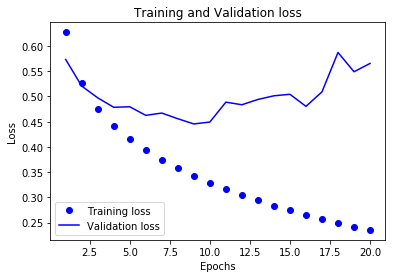

In [18]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

# 'bo' is for 'blue dot', 'b' is for 'solid blue line'
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Weight regularization (*L2 regularization*)**

In [0]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                      activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                      activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

`l2(0.001)` means every coefficient in the weight matrix of the layer will add `0.001 * weight_coefficient_value` to the total loss of the network. Because this penalty is *only added at training time*, the loss for this network will be much higher at training than at test time.

---

Alternatively, Keras has its own weight regularizers

In [0]:
# L1 regularization
regularizers.l1(0.001)

# simultaneous L1 and L2 regularization
regularizers.l1_12(l1=0.001, l2=0.001)